# Giới thiệu bài toán

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân tử vong thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong.
Bộ dữ liệu này được sử dụng để dự đoán liệu một bệnh nhân có khả năng bị đột quỵ hay không dựa trên các thông số đầu vào như giới tính, tuổi tác, các bệnh khác nhau và tình trạng hút thuốc

Thông tin dữ liệu :


* id ( định danh ) : unique identifier
* gender ( giới tính ) : "Male", "Female" or "Other"
* age ( tuổi ) : age of the patient
* hypertension ( tăng huyết áp ) : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease ( bệnh tim ) : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married ( từng kết hôn ) : "No" or "Yes"
* work_type ( tình trạng công việc ) : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type ( khu vực ) : "Rural" or "Urban"
* avg_glucose_level ( mức độ gluco trong máu ) : average glucose level in blood
* bmi ( chỉ số thông tin cơ thể ) : body mass index
* smoking_status ( tình trạng hút thuốc ) : "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke ( đột quỵ ): 1 if the patient had a stroke or 0 if not





===> biến id không có tác dụng trong việc dự đoán , chúng ta sẽ bỏ biến id

* Các biến đầu vào phân loại : hypertension , heart_disease , ever_married , work_type , smoking_status
* Các biến đầu vào liên tục : age , avg_glucose_level , bmi
* Biến mục tiêu : stroke

# Trực quan hóa dữ liệu

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('gdrive/MyDrive/ML')

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
!pip uninstall -y pandas-profiling

In [ ]:
!pip install pandas-profiling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
import pandas_profiling
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
from pandas_profiling import ProfileReport
import pandas_profiling

In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/ML/healthcare-dataset-stroke-data.csv")
data.shape

(5110, 12)

In [5]:
profile = ProfileReport(data, title="Dataset", html={'style' : {'full_width':True}})
profile.to_file(output_file="name of html file.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# loại bỏ biến id , đây là biến định danh , không giúp ích cho việc giải quyết bài toán
data.drop('id', axis = 1, inplace = True)

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


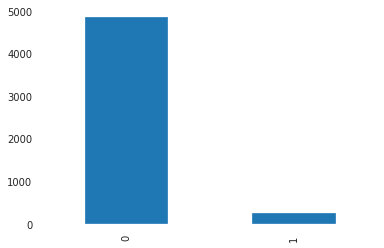


Nhãn 0 : người không bị đột quỵ 	 Nhãn 1 : người bị đột quỵ

Số người không bị đột quỵ: 4861

Số người bị đột quỵ: 249

Tỉ lệ người không bị đột quỵ: 95.12720156555773%

Tỉ lệ người bị đột quỵ: 4.87279843444227%


In [ ]:
stroke_counts = data["stroke"].value_counts()
data["stroke"].value_counts().plot(kind = "bar")
plt.show()
print("\nNhãn 0 : người không bị đột quỵ \t Nhãn 1 : người bị đột quỵ")
print(f"\nSố người không bị đột quỵ: {stroke_counts[0] }")
print(f"\nSố người bị đột quỵ: {stroke_counts[1]}")
print(f"\nTỉ lệ người không bị đột quỵ: {(stroke_counts[0] / sum(stroke_counts))*100}%")
print(f"\nTỉ lệ người bị đột quỵ: {(stroke_counts[1] / sum(stroke_counts))*100}%")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

=> Ở đây biến bmi bị thiếu 201 dữ liệu

In [ ]:
all_columns = list(data.columns)
cat_cols  = [column for column in all_columns if len(data[column].unique()) <= 5]
num_cols  = [column for column in all_columns if column not in cat_cols]
print(f"Numeric Columns: {', '.join(num_cols)}")
print(f"Categorical Columns: {', '.join(cat_cols)}")

Numeric Columns: age, avg_glucose_level, bmi
Categorical Columns: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke


### Đối với biến phân loại

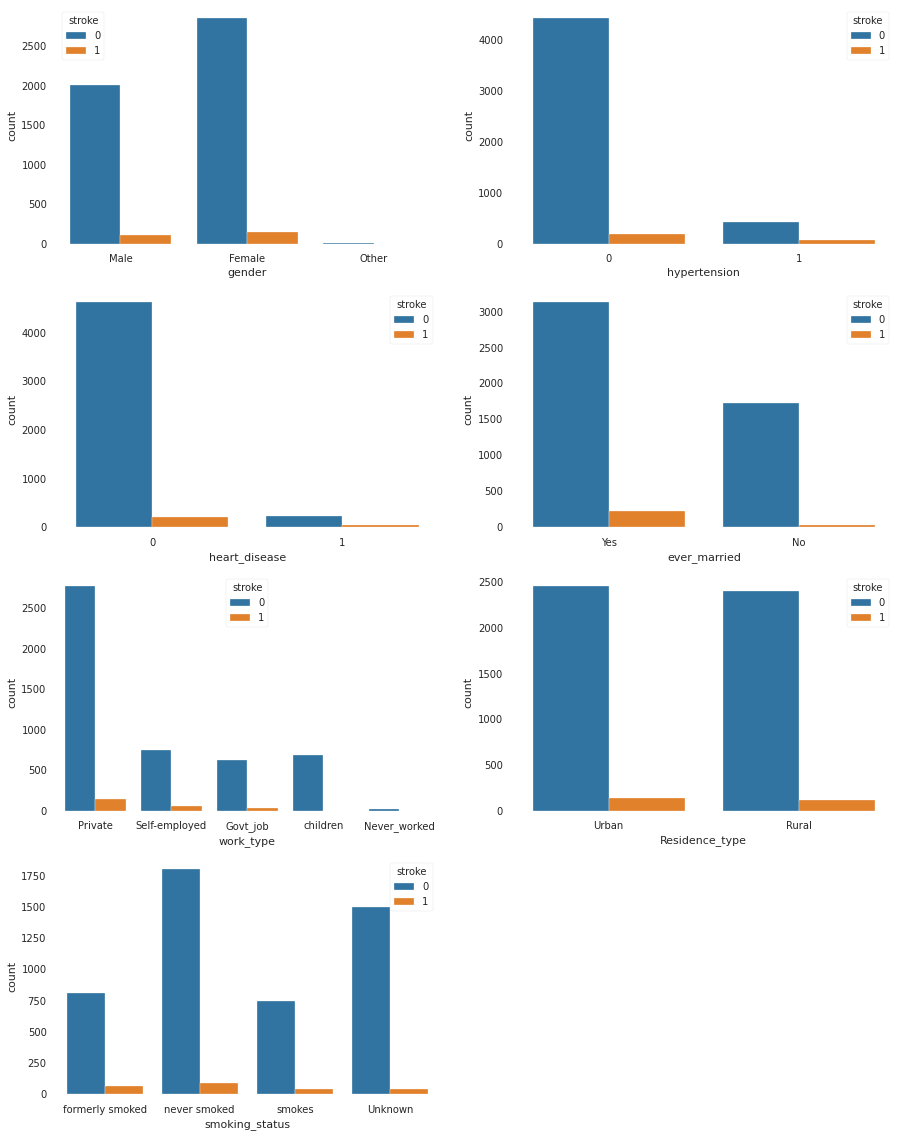

In [ ]:
plt.figure(figsize = (15,20))
i = 1
for column in cat_cols[:-1]:
    plt.subplot(4, 2, i)
    sns.countplot(x = data[column], hue = data["stroke"])
    
    i+=1
plt.show()

Nhận xét :
- Tỉ lệ nam / nữ đột quỵ tỉ lệ thuận với số lượng
- Tỉ lệ người  không bị tăng huyết áp bị đột quỵ cao hơn người bị tăng huyết áp
- Rất ít trường hợp bị bệnh tim mà bị đột quỵ
- Đa số người bị đột quỵ là người đã kết hôn ( đa số người từ độ tuổi trưởng thành trở lên bị đột quỵ )
- Tỉ lệ đột quỵ giữa nông thôn và thành thị là như nhau
- Tỉ lệ người có làm công việc tự do bị đột quỵ cao 

### Đối với biến liên tục

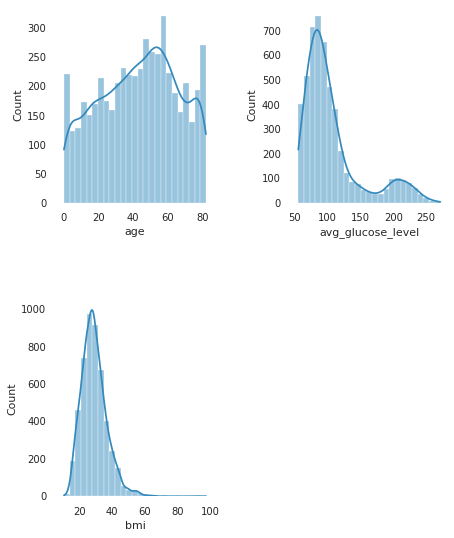

In [ ]:
plt.figure(figsize = (7,9))
i = 1
for column in num_cols:
    plt.subplot(2, 2, i)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    sns.histplot(data[column], bins = 25,kde = True)
    i+=1
plt.show()

Nhận xét : 
- Lượng  gluco trong máu khoảng 70 - 120 hay bị đột quỵ
- Chỉ số bmi 25 - 35 dễ bị đột quỵ

bmi, avg_glucose_level có nhiều outlier

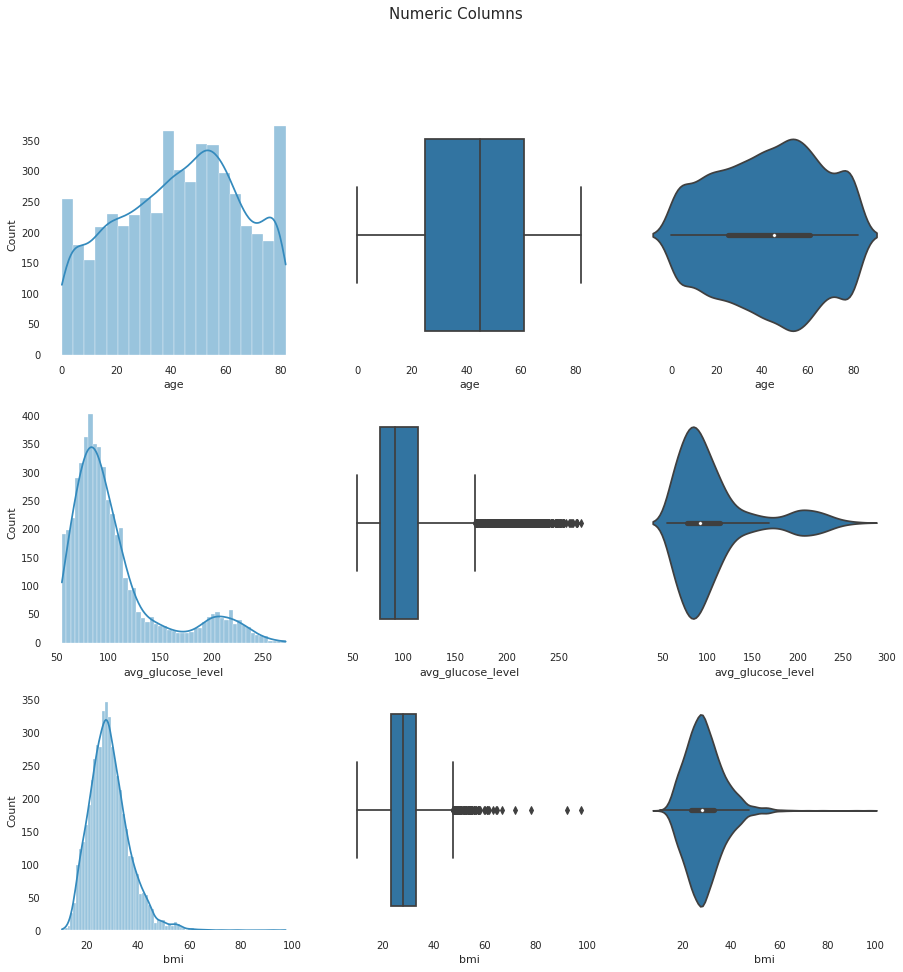

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(num_cols):
    plt.suptitle("Numeric Columns",size= 15)
    sns.histplot(data[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=data,x=i,ax=ax[index,1])
    sns.violinplot(data=data,x=i,ax=ax[index,2])

In [ ]:
display(data[data['work_type'] == 'children'].describe())
display(data[data['age'] < 3].describe())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,687.000000,687.0,687.000000,687.000000,671.000000,687.000000
mean,6.841339,0.0,0.001456,94.400277,20.038003,0.002911
std,4.533364,0.0,0.038152,26.658955,4.540639,0.053916
min,0.080000,0.0,0.000000,55.340000,10.300000,0.000000
25%,2.000000,0.0,0.000000,76.255000,17.150000,0.000000
50%,6.000000,0.0,0.000000,90.220000,18.900000,0.000000
75%,11.000000,0.0,0.000000,108.710000,21.600000,0.000000
max,16.000000,0.0,1.000000,219.810000,41.700000,1.000000


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,175.00000,175.0,175.000000,175.000000,169.000000,175.000000
mean,1.40000,0.0,0.005714,95.463200,18.676923,0.005714
std,0.59954,0.0,0.075593,27.595876,3.115075,0.075593
min,0.08000,0.0,0.000000,55.510000,10.300000,0.000000
25%,1.00000,0.0,0.000000,75.455000,16.900000,0.000000
50%,1.56000,0.0,0.000000,90.510000,18.500000,0.000000
75%,2.00000,0.0,0.000000,111.710000,20.300000,0.000000
max,2.00000,0.0,1.000000,199.830000,33.100000,1.000000


=> trẻ em hơn 600 quan sát : trẻ em có chỉ số bmi, ave_glucose_level thấp

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Text(0, 0.5, 'Counts')

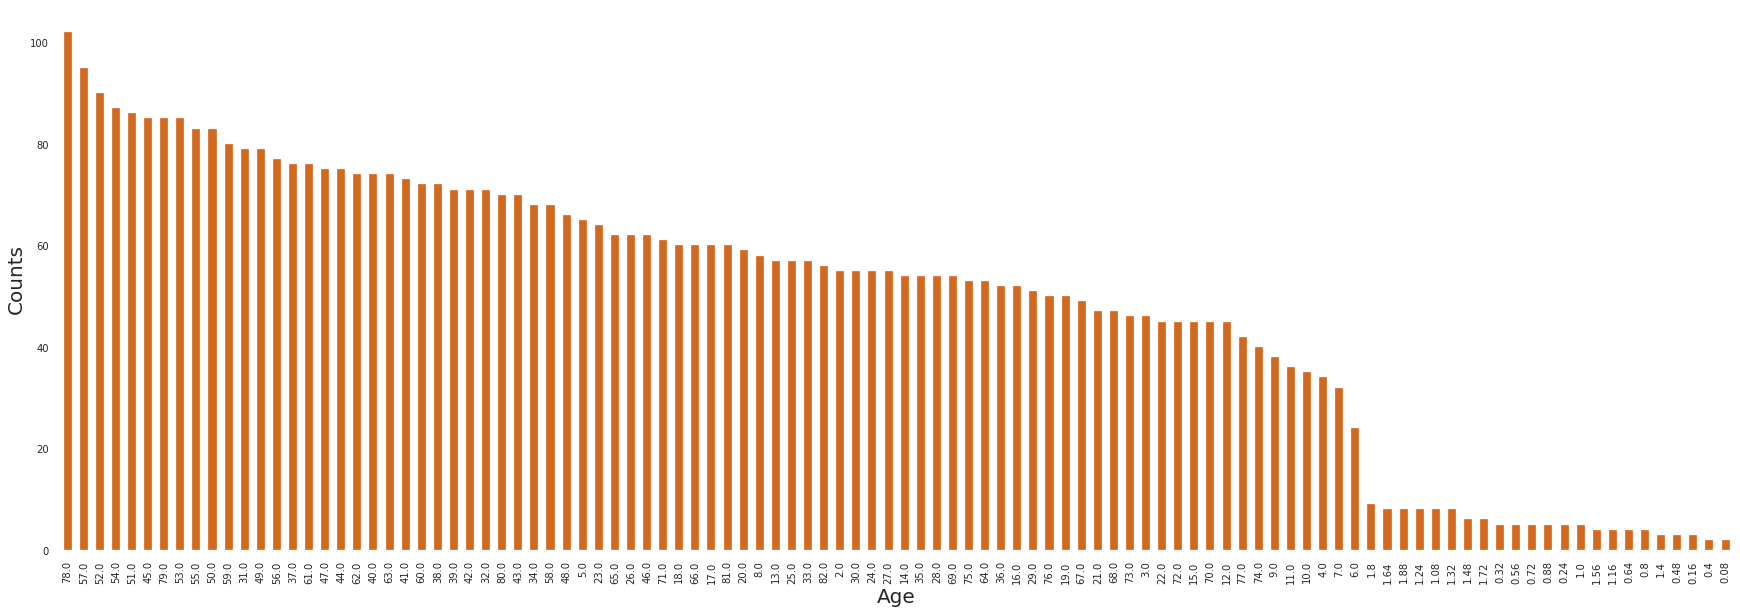

In [ ]:
plt.figure(figsize=(30, 10))
data['age'].value_counts().plot(kind='bar', color='chocolate')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Counts', fontsize=20)

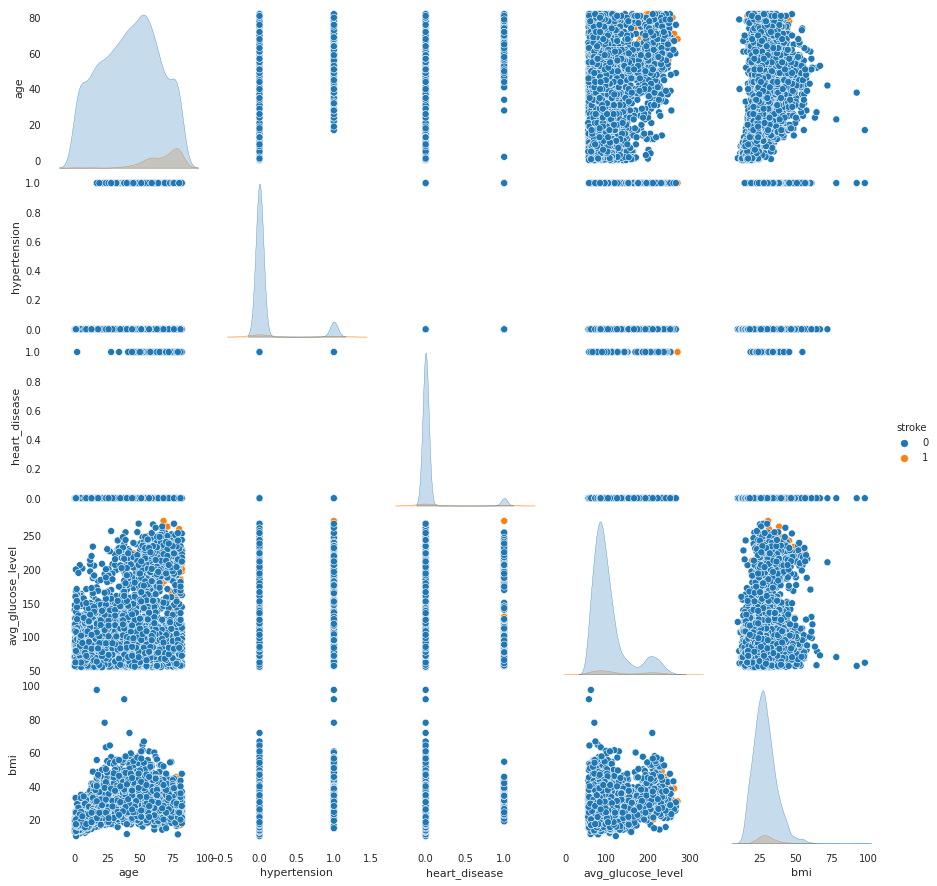

In [ ]:
sns.pairplot(data=data,hue='stroke')

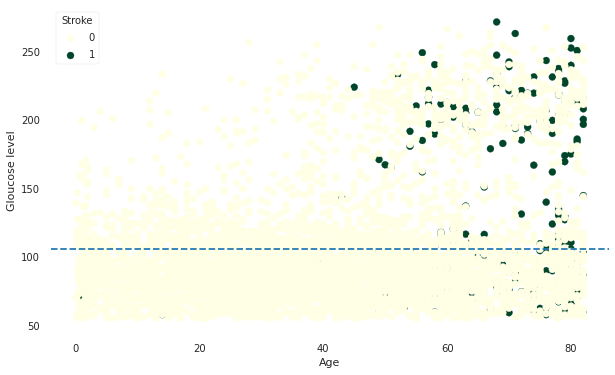

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x= data["age"],
                    y=data["avg_glucose_level"],
                    c=data["stroke"], cmap='YlGn');
ax.set(
      xlabel = "Age",
     ylabel ="Gloucose level");
ax.legend(*scatter.legend_elements(),title="Stroke");
ax.axhline(data["avg_glucose_level"].mean(),linestyle='--');

=> Người cao tuổi có lượng đường gluco trong máu cao

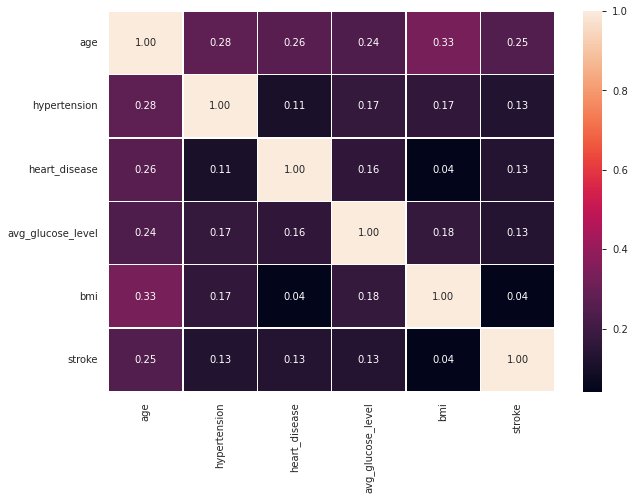

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='0.2f')
plt.show()

=> Các biến không có nhiều mối tương quan

# Tiền xử lí dữ liệu

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# điền các giá trị bị thiếu biến bmi bằng median ( ít ảnh hưởng bởi outlier)
data['bmi'].fillna((data['bmi'].median()), inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Xử dụng median để điền các giá trị bị thiếu trong biến bmi ( không bị ảnh hưởng bởi outlier )

In [ ]:
features_cat = ['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:

# Đối với biến phân loại
data = pd.get_dummies(data=data, columns= features_cat)
data.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,28.1,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0


# Huấn luyện mô hình

## Phân chia tập train ,test

In [ ]:
x = data.drop('stroke', axis=1)
y = data['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify = y)
print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Train Data: {x_test.shape}, {y_test.shape}")

Train Data: (4088, 23), (4088,)
Train Data: (1022, 23), (1022,)


In [ ]:
std_scaler  = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [ ]:
model1 = {
    'Logistic Reg': LogisticRegression(random_state=0, max_iter=500, solver='lbfgs'),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(random_state=0),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0),
    'Support Vector Machine': SVC(random_state=0),
    'K Nearest Classifier': KNeighborsClassifier(),
    'Decison Tree': DecisionTreeClassifier(random_state=0)
            }


In [ ]:
model_list = []
train_acc_list = []
test_acc_list = []
counter_list = []

for model, clf in model1.items():
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    train_pred =  clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    counter = Counter(predictions)
    print(model, 'Model')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test,predictions))
    print('--------------------------------')
    
    model_list.append(model)
    train_acc_list.append(train_acc)
    test_acc_list.append(acc)   
    counter_list.append(counter)

Logistic Reg Model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

[[972   0]
 [ 50   0]]
--------------------------------
Naive Bayes Model
              precision    recall  f1-score   support

           0       1.00      0.33      0.50       972
           1       0.07      1.00      0.13        50

    accuracy                           0.37      1022
   macro avg       0.54      0.67      0.32      1022
weighted avg       0.95      0.37      0.48      1022

[[325 647]
 [  0  50]]
--------------------------------
Random Forest Classifier Model
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

  

In [ ]:
results = pd.DataFrame({"model": model_list, "train_accuracy": train_acc_list, "test_acc": test_acc_list, 'counter': counter_list})

In [ ]:
display(results)
Counter(y_test)

,model,train_accuracy,test_acc,counter
0,Logistic Reg,0.951566,0.951076,{0: 1022}
1,Naive Bayes,0.340020,0.366928,"{1: 697, 0: 325}"
2,Random Forest Classifier,0.999755,0.952055,"{0: 1021, 1: 1}"
3,Gradient Boosting Classifier,0.957192,0.951076,{0: 1022}
4,Support Vector Machine,0.951566,0.951076,{0: 1022}
5,K Nearest Classifier,0.952055,0.949119,"{0: 1018, 1: 4}"
6,Decison Tree,1.000000,0.912916,"{0: 965, 1: 57}"


Counter({0: 972, 1: 50})

Một số mô hình : Random Forest , Decision Tree đang gặp hiện tượng overfitting . Mặc dù mô hình Decision Tree đang có số lượng dự báo người bị đột quỵ gần với số lượng thực tế nhưng mô hình này chỉ dự báo đúng 9/50 quan sát đúng thôi

* Để giải quyết một số mô hình dự báo chưa tốt ( bị mất cân bằng dữ liệu nhãn 0 có hơn 95% quan sát trong khi có nhãn 1 chưa đến 5 % quan sát ) => tăng số lượng mẫu quan sát : bằng cách dùng SMOTE ( phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu )

In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)
X_test_smote, y_test_smote = oversample.fit_resample(x_test, y_test)

In [ ]:
print('Train : ', x_train.shape, y_train.shape)
print('Smote train : ', X_train_smote.shape, y_train_smote.shape)
print('Test : ', x_test.shape, y_test.shape)
print('Smote test : ', X_test_smote.shape, y_test_smote.shape)

Train :  (4088, 23) (4088,)
Smote train :  (7778, 23) (7778,)
Test :  (1022, 23) (1022,)
Smote test :  (1944, 23) (1944,)


In [ ]:
modell ={
    'Logistic Reg': LogisticRegression(random_state=0, max_iter=550, solver='lbfgs'),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(random_state=0),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0),
    'Support Vector Machine': SVC(random_state=0),
    'K Nearest Classifier': KNeighborsClassifier(),
    'Decison Tree': DecisionTreeClassifier(random_state=0)
}

In [ ]:
model_list2 = []
train_acc_list2 = []
test_acc_list2 = []
counter_list2 = []
metric_scores_list2 = []

for model, clf in modell.items():
    clf.fit(X_train_smote, y_train_smote)
    predictions = clf.predict(X_test_smote)
    acc = accuracy_score(y_test_smote, predictions)
    train_pred =  clf.predict(X_train_smote)
    train_acc = accuracy_score(y_train_smote, train_pred)
    counter = Counter(predictions)
    report = precision_recall_fscore_support(y_test_smote, predictions, average='binary')
    report_values =  ("precision = %0.3f, recall = %0.3f, F1 = %0.3f, accuracy = %0.3f" % \
           (report[0], report[1], report[2], acc))
    print(model, 'Model')
    print(classification_report(y_test_smote, predictions))
    print(confusion_matrix(y_test_smote,predictions))
    print('-'*50)
    
    model_list2.append(model)
    train_acc_list2.append(train_acc)
    test_acc_list2.append(acc)   
    counter_list2.append(counter)
    metric_scores_list2.append(report_values)

Logistic Reg Model
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       972
           1       0.78      0.90      0.84       972

    accuracy                           0.83      1944
   macro avg       0.83      0.83      0.83      1944
weighted avg       0.83      0.83      0.83      1944

[[730 242]
 [ 95 877]]
--------------------------------------------------
Naive Bayes Model
              precision    recall  f1-score   support

           0       1.00      0.35      0.52       972
           1       0.61      1.00      0.75       972

    accuracy                           0.67      1944
   macro avg       0.80      0.67      0.64      1944
weighted avg       0.80      0.67      0.64      1944

[[338 634]
 [  0 972]]
--------------------------------------------------
Random Forest Classifier Model
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       972
           1       0.

In [ ]:
results = pd.DataFrame({"model": model_list2, "train_accuracy": train_acc_list2, "test_acc": test_acc_list2,'metric':metric_scores_list2, 'counter': counter_list2})

In [ ]:
display(results) 
Counter(y_test_smote)

,model,train_accuracy,test_acc,metric,counter
0,Logistic Reg,0.773592,0.826646,"precision = 0.784, recall = 0.902, F1 = 0.839,...","{0: 825, 1: 1119}"
1,Naive Bayes,0.653124,0.673868,"precision = 0.605, recall = 1.000, F1 = 0.754,...","{1: 1606, 0: 338}"
2,Random Forest Classifier,1.000000,0.796811,"precision = 0.934, recall = 0.639, F1 = 0.759,...","{0: 1279, 1: 665}"
3,Gradient Boosting Classifier,0.908717,0.907922,"precision = 0.882, recall = 0.942, F1 = 0.911,...","{0: 905, 1: 1039}"
4,Support Vector Machine,0.896374,0.799383,"precision = 0.821, recall = 0.765, F1 = 0.792,...","{0: 1038, 1: 906}"
5,K Nearest Classifier,0.939959,0.641461,"precision = 0.760, recall = 0.414, F1 = 0.536,...","{0: 1415, 1: 529}"
6,Decison Tree,1.000000,0.750514,"precision = 0.857, recall = 0.602, F1 = 0.707,...","{0: 1261, 1: 683}"


Counter({0: 972, 1: 972})

=> Lựa chọn mô hình :Gradiant Boosting là tốt nhất 

# GridSeach

## GradientBoosting

In [ ]:
from sklearn.model_selection import GridSearchCV
praram1 = {'learning_rate':[0.1], 'n_estimators':[1500], 'max_depth': [5]}

gdb = GridSearchCV(estimator=GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = praram1, scoring='accuracy',n_jobs=-1, cv=5)
gdb.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators': [1500]},
             scoring='accuracy')

In [ ]:
gdb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1500}

In [ ]:
gdb.best_score_

0.9542323047801684

In [ ]:
preds = gdb.predict(X_test_smote)
acc_gdb = accuracy_score(y_test_smote, preds)
print(acc_gdb)


0.8950617283950617


              precision    recall  f1-score   support

           0       0.85      0.96      0.90       972
           1       0.96      0.83      0.89       972

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.89      1944
weighted avg       0.90      0.90      0.89      1944

[[935  37]
 [167 805]]


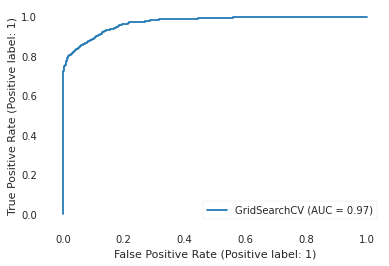

In [ ]:
print(classification_report(y_test_smote, preds))
print(confusion_matrix(y_test_smote,preds))
Counter(y_test_smote)
metrics.plot_roc_curve(gdb, X_test_smote, y_test_smote)